In [50]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
import seaborn as sns

In [51]:
df=pd.read_csv("Reviews.csv")
df

,Review,Liked
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1
...,...,...
995,I think food should have flavor and texture an...,0
996,Appetite instantly gone.,0
997,Overall I was not impressed and would not go b...,0
998,"The whole experience was underwhelming, and I ...",0


In [52]:
df.head()

,Review,Liked
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1


In [53]:
df.tail(10)

,Review,Liked
990,The refried beans that came with my meal were ...,0
991,Spend your money and time some place else.,0
992,A lady at the table next to us found a live gr...,0
993,the presentation of the food was awful.,0
994,I can't tell you how disappointed I was.,0
995,I think food should have flavor and texture an...,0
996,Appetite instantly gone.,0
997,Overall I was not impressed and would not go b...,0
998,"The whole experience was underwhelming, and I ...",0
999,"Then, as if I hadn't wasted enough of my life ...",0


In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Review  1000 non-null   object
 1   Liked   1000 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 15.8+ KB


In [55]:
df.shape

(1000, 2)

In [56]:
df.describe()

,Liked
count,1000.00000
mean,0.50000
std,0.50025
min,0.00000
25%,0.00000
50%,0.50000
75%,1.00000
max,1.00000


In [57]:
df.describe()

0      False
1      False
2      False
3      False
4      False
       ...  
995    False
996    False
997    False
998    False
999    False
Length: 1000, dtype: bool

In [58]:
liked_counts = df['Liked'].value_counts()
print(liked_counts)

1    500
0    500
Name: Liked, dtype: int64


In [60]:
import matplotlib.pyplot as plt
import seaborn as sns

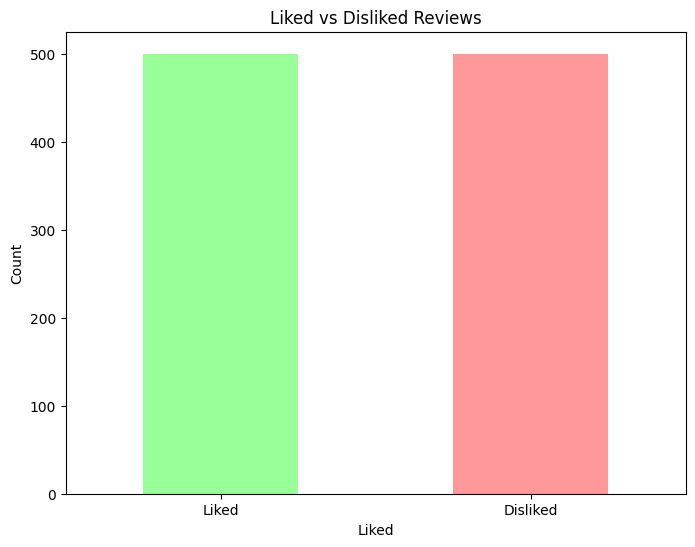

In [62]:
light_green = '#99ff99'
light_red = '#ff9999'

plt.figure(figsize=(8, 6))
liked_counts.plot(kind='bar', color=[light_green, light_red])
plt.title('Liked vs Disliked Reviews')
plt.xlabel('Liked')
plt.ylabel('Count')
plt.xticks([0, 1], ['Liked', 'Disliked'], rotation=0)
plt.show()

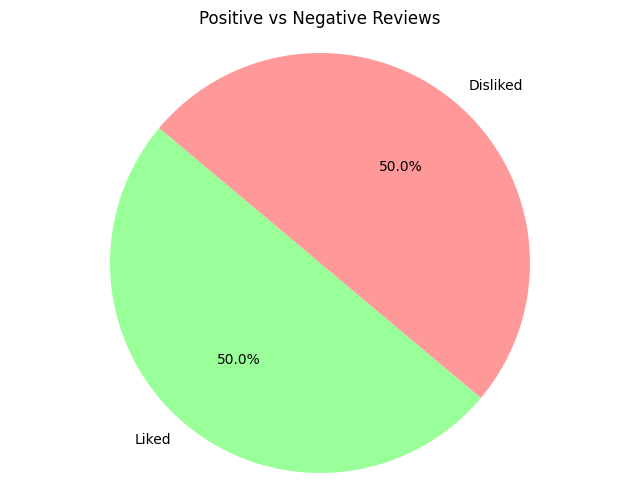

In [63]:
light_green = '#99ff99'
light_red = '#ff9999'
plt.figure(figsize=(8, 6))
plt.pie(liked_counts, labels=['Liked', 'Disliked'], colors=[light_green, light_red], autopct='%1.1f%%', startangle=140)
plt.axis('equal')
plt.title('Positive vs Negative Reviews')
plt.show()

In [31]:
pip install wordcloud


     |████████████████████████████████| 520 kB 411 kB/s eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


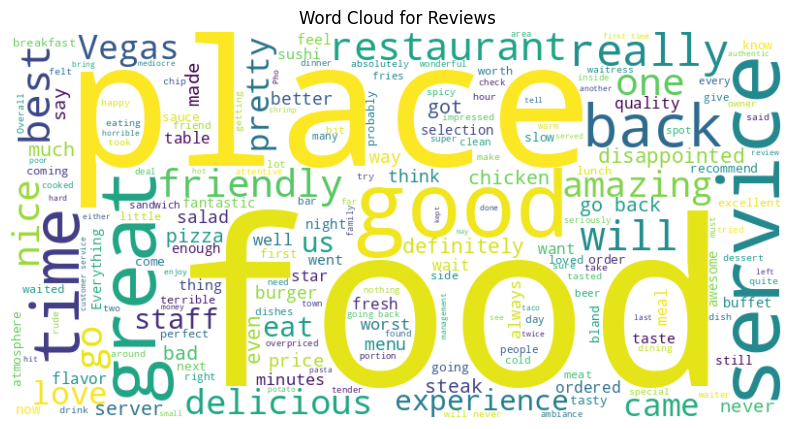

In [39]:
text = ' '.join(df['Review'])

# Generate a word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

# Display the word cloud
plt.figure(figsize=(10, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Word Cloud for Reviews')
plt.axis('off')
plt.show()

In [47]:
#convert a data set into lower case
lowercase_text = df['Review'].str.lower()

In [48]:
print(lowercase_text)

0                               wow... loved this place.
1                                     crust is not good.
2              not tasty and the texture was just nasty.
3      stopped by during the late may bank holiday of...
4      the selection on the menu was great and so wer...
                             ...                        
995    i think food should have flavor and texture an...
996                             appetite instantly gone.
997    overall i was not impressed and would not go b...
998    the whole experience was underwhelming, and i ...
999    then, as if i hadn't wasted enough of my life ...
Name: Review, Length: 1000, dtype: object


In [64]:
import string
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

# Download necessary NLTK data files
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

# Function to preprocess text
def preprocess_text(text):
    text = text.lower()
    text = text.translate(str.maketrans('', '', string.punctuation))
    tokens = nltk.word_tokenize(text)
    tokens = [lemmatizer.lemmatize(word) for word in tokens if word not in stop_words]
    return ' '.join(tokens)

df['processed_review'] = df['Review'].apply(preprocess_text)

print(df['processed_review'].head())


[nltk_data] Downloading package punkt to /home/rgukt/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /home/rgukt/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /home/rgukt/nltk_data...


0                                      wow loved place
1                                           crust good
2                                  tasty texture nasty
3    stopped late may bank holiday rick steve recom...
4                           selection menu great price
Name: processed_review, dtype: object


In [65]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Vectorize the text data
vectorizer = TfidfVectorizer(max_features=5000)
X = vectorizer.fit_transform(df['processed_review']).toarray()
y = df['Liked']

print(X.shape)


(1000, 1826)


In [66]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(X_train.shape, X_test.shape)


(800, 1826) (200, 1826)


Logistic Regression Accuracy: 0.77
Confusion Matrix:
 [[83 13]
 [33 71]]


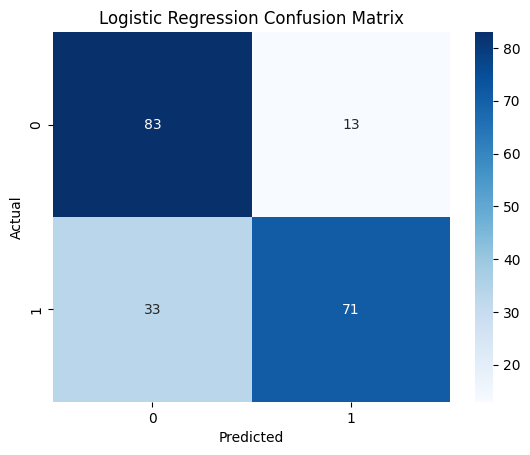

In [67]:
# Train a Logistic Regression model
lr = LogisticRegression()
lr.fit(X_train, y_train)

# Predict on test data
y_pred_lr = lr.predict(X_test)

# Evaluate the model
accuracy_lr = accuracy_score(y_test, y_pred_lr)
confusion_lr = confusion_matrix(y_test, y_pred_lr)

print(f'Logistic Regression Accuracy: {accuracy_lr}')
print('Confusion Matrix:\n', confusion_lr)

# Plot confusion matrix
sns.heatmap(confusion_lr, annot=True, fmt='d', cmap='Blues')
plt.title('Logistic Regression Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


KNN Accuracy: 0.78
Confusion Matrix:
 [[74 22]
 [22 82]]


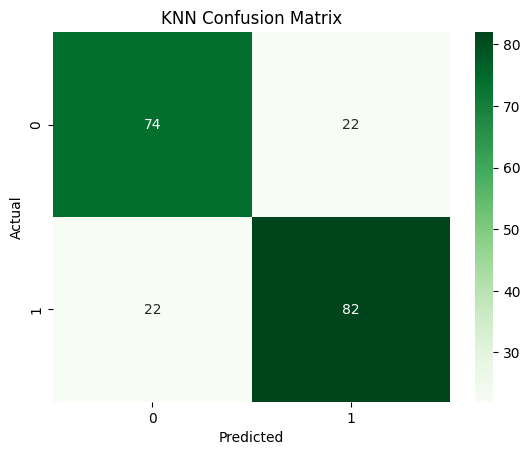

In [68]:
# Train a KNN model
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

# Predict on test data
y_pred_knn = knn.predict(X_test)

# Evaluate the model
accuracy_knn = accuracy_score(y_test, y_pred_knn)
confusion_knn = confusion_matrix(y_test, y_pred_knn)

print(f'KNN Accuracy: {accuracy_knn}')
print('Confusion Matrix:\n', confusion_knn)

# Plot confusion matrix
sns.heatmap(confusion_knn, annot=True, fmt='d', cmap='Greens')
plt.title('KNN Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


SVM Accuracy: 0.775
Confusion Matrix:
 [[86 10]
 [35 69]]


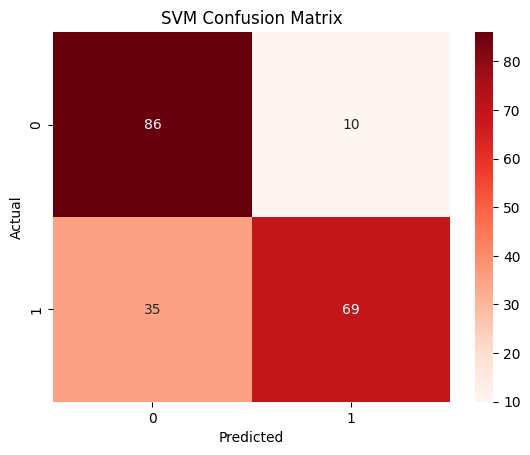

In [69]:
# Train a SVM model
svm = SVC()
svm.fit(X_train, y_train)

# Predict on test data
y_pred_svm = svm.predict(X_test)

# Evaluate the model
accuracy_svm = accuracy_score(y_test, y_pred_svm)
confusion_svm = confusion_matrix(y_test, y_pred_svm)

print(f'SVM Accuracy: {accuracy_svm}')
print('Confusion Matrix:\n', confusion_svm)

# Plot confusion matrix
sns.heatmap(confusion_svm, annot=True, fmt='d', cmap='Reds')
plt.title('SVM Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


In [73]:
# Function to predict review sentiment
def predict_review_sentiment(review, model, vectorizer):
    # Preprocess the review
    processed_review = preprocess_text(review)
    
    # Vectorize the review
    vectorized_review = vectorizer.transform([processed_review]).toarray()
    
    # Predict the sentiment
    prediction = model.predict(vectorized_review)
    
    # Map the prediction to the corresponding label
    return 'Liked' if prediction[0] == 1 else 'Disliked'

# Example reviews
reviews = [
    "Stopped by during the late May bank holiday off Rick Steve recommendation and loved it.",
"The selection on the menu was great and so were the prices.",
    "The cashier had no care what so ever on what I had to say it still ended up being wayyy overpriced."]
    

# Predict the sentiment for each review
for review in reviews:
    sentiment = predict_review_sentiment(review, lr, vectorizer)
    print(f'Review: "{review}"\nSentiment: {sentiment}\n')


Review: "Stopped by during the late May bank holiday off Rick Steve recommendation and loved it."
Sentiment: Liked

Review: "The selection on the menu was great and so were the prices."
Sentiment: Liked

Review: "The cashier had no care what so ever on what I had to say it still ended up being wayyy overpriced."
Sentiment: Disliked

